In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from math import log2
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [3]:
# Create the Dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Cloudy', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Play': ['Don\'t Play', 'Don\'t Play', 'Play', 'Play', 'Play', 'Play', 'Play', 'Don\'t Play', 'Play', 'Play', 'Play', 'Play', 'Play', 'Don\'t Play']
}

df = pd.DataFrame(data)

In [4]:
# Calculate Entropy Function
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = -sum((counts[i] / len(target_col)) * log2(counts[i] / len(target_col)) for i in range(len(elements)))
    return entropy

In [5]:
# Calculate Information Gain Function
def info_gain(data, split_attribute_name, target_name="Play"):
    # Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    # Calculate the weighted entropy of the split attribute
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(data[data[split_attribute_name] == vals[i]][target_name]) for i in range(len(vals)))
    
    # Calculate the information gain
    information_gain = total_entropy - weighted_entropy
    return information_gain

Entropy dari dataset: 0.863120568566631
Information Gain untuk Outlook: 0.2585210366587628
Information Gain untuk Temperature: 0.18385092540042125
Information Gain untuk Humidity: 0.3705065005495052
Information Gain untuk Windy: 0.0059777114237739015


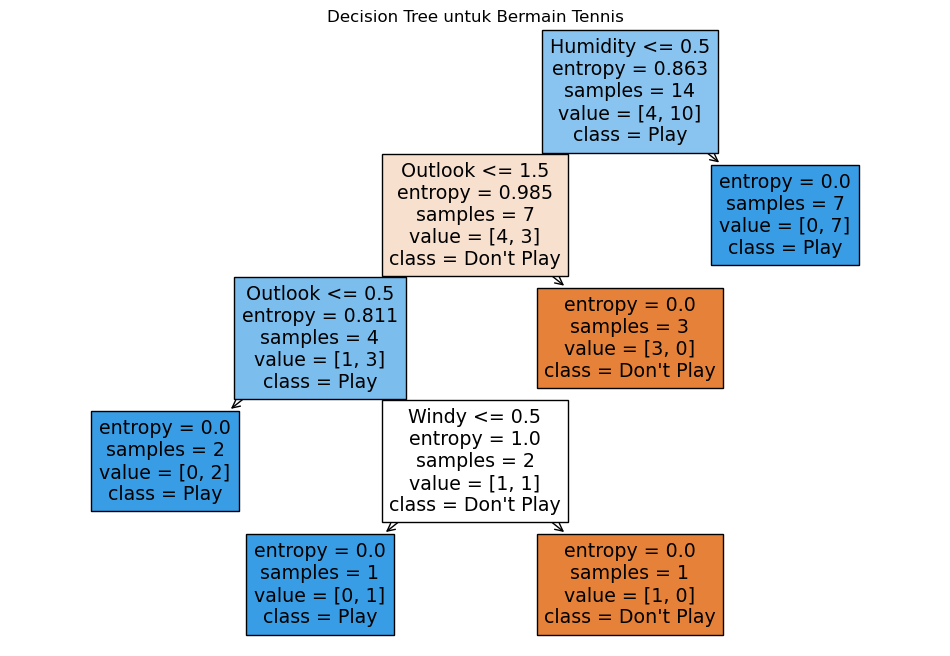

In [6]:
# Entropy of the entire dataset
total_entropy = entropy(df['Play'])
print(f'Entropy dari dataset: {total_entropy}')

# Calculate Information Gain for Each Attribute
attributes = ['Outlook', 'Temperature', 'Humidity', 'Windy']
for attribute in attributes:
    print(f'Information Gain untuk {attribute}: {info_gain(df, attribute)}')

# Prepare Data for Decision Tree Model
# Convert categorical variables to numerical codes
df_encoded = df.copy()
df_encoded['Outlook'] = df_encoded['Outlook'].astype('category').cat.codes
df_encoded['Temperature'] = df_encoded['Temperature'].astype('category').cat.codes
df_encoded['Humidity'] = df_encoded['Humidity'].astype('category').cat.codes
df_encoded['Windy'] = df_encoded['Windy'].astype('category').cat.codes
df_encoded['Play'] = df_encoded['Play'].apply(lambda x: 1 if x == 'Play' else 0)

# Define features (X) and target (y)
X = df_encoded[['Outlook', 'Temperature', 'Humidity', 'Windy']]
y = df_encoded['Play']

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Outlook', 'Temperature', 'Humidity', 'Windy'], 
          class_names=['Don\'t Play', 'Play'], filled=True)
plt.title("Decision Tree untuk Bermain Tennis")
plt.show()